# Analyzing House Sales in King County: A Multiple Linear Regression Approach

![King County.jpg](<attachment:King County.jpg>)
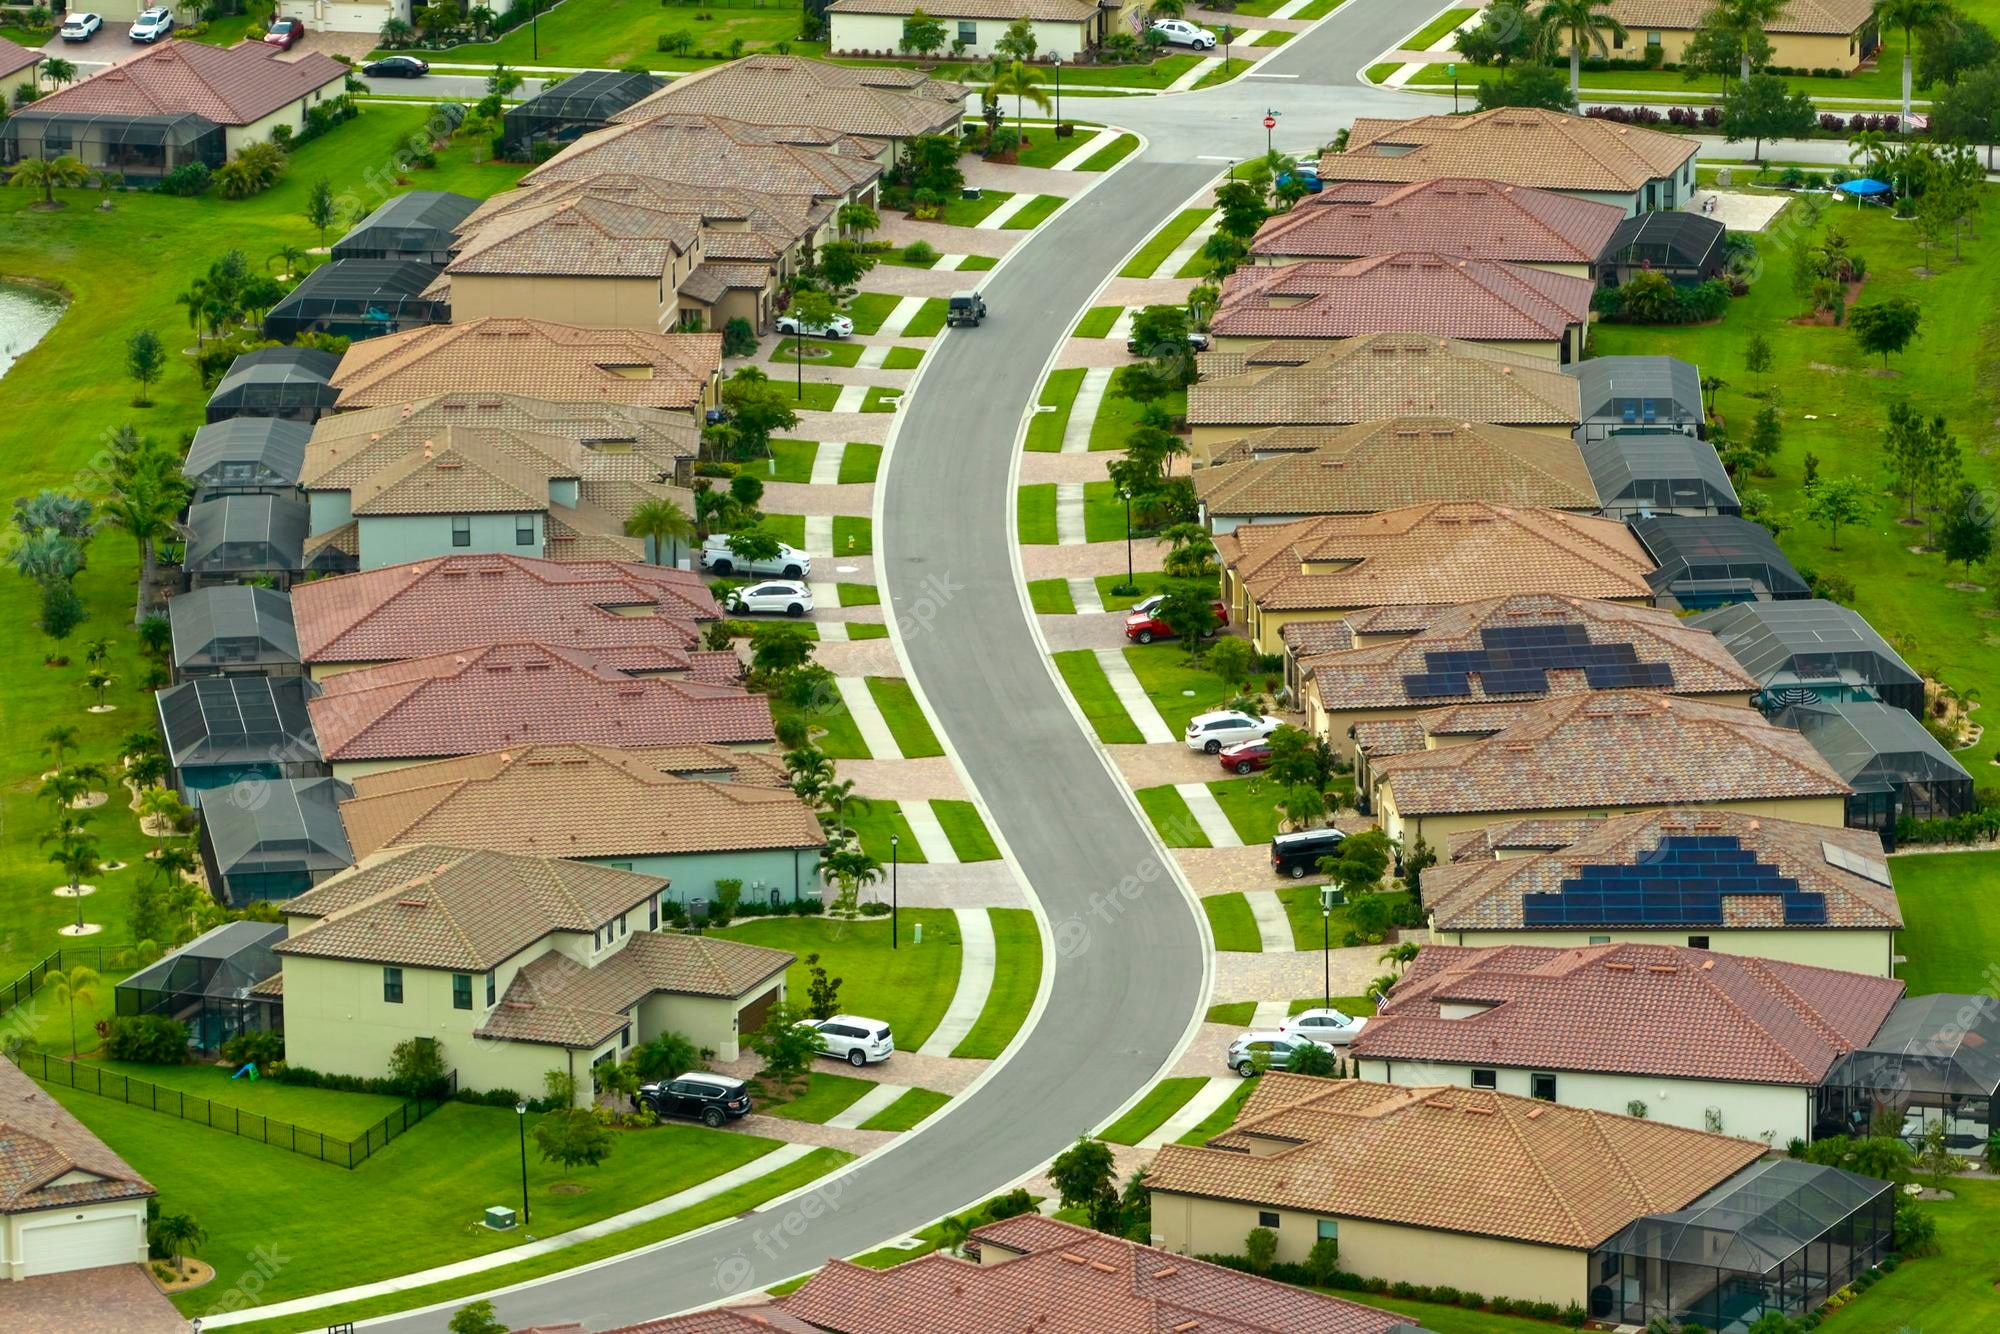

## Overview
Nyika Developers, a reputable and customer-centric real estate agency, has recognized the importance of empowering homeowners with accurate and data-driven insights about the potential impact of home renovations on the estimated value of their properties. As homeowners strive to maximize the value of their homes before selling or seek long-term investment opportunities, the need for informed guidance becomes paramount. Therefore, Nyika Developers has commissioned this project to analyze house sales in King County using multiple linear regression modelling.

The utilization of multiple linear regression modelling allows for a comprehensive examination of various factors that influence the sale prices of houses. By identifying the relationships between these factors and the sale prices, Nyika Developers can offer valuable advice to homeowners, enabling them to make informed decisions regarding home renovations and their potential financial benefits.

## Statement of the Problem
The real estate market is a dynamic and complex domain, where homeowners constantly seek ways to enhance the value of their properties. In this context, Nyika Developers, a reputable real estate agency, faces the challenge of providing accurate and data-driven advice to homeowners regarding the potential impact of home renovations on the estimated value of their properties. The lack of comprehensive insights in this regard hinders homeowners from making informed decisions, optimizing their investments, and maximizing the financial gains from their properties.

The problem at hand is two-fold. Firstly, homeowners lack the knowledge and expertise to determine which renovations are most likely to increase the value of their properties. They face uncertainties regarding which features, modifications, or improvements will have the most significant impact on the estimated value and ultimately lead to higher sale prices. Without this crucial information, homeowners may make uninformed decisions, resulting in suboptimal investments and missed opportunities.

Secondly, Nyika Developers currently lacks a systematic approach to provide homeowners with personalized advice on renovations and their potential financial benefits. While the agency possesses extensive experience in the real estate market, it lacks a robust and data-driven methodology to quantify the impact of different renovation types accurately. As a result, Nyika Developers cannot provide homeowners with precise estimates of the value increase resulting from specific renovations, limiting their ability to guide homeowners effectively and build trust-based relationships.

Addressing these challenges requires a comprehensive analysis of house sales data in King county, utilizing multiple linear regression modelling. By identifying the relationship between various factors and the sale prices of houses, Nyika Developers can gain valuable insights into the impact of home renovations on property values. This analysis will enable the agency to develop a predictive model that estimates the value of a house based on a set of relevant features, facilitating personalized recommendations to homeowners.

Thus, the problem to be solved in this project is to provide homeowners with accurate and data-driven advice on how home renovations might increase the estimated value of their properties, and by what amount. By leveraging multiple linear regression modelling and analyzing house sales data, the goal is to quantify the impact of renovations, identify the most influential factors, and provide homeowners with insights to make informed decisions. Ultimately, the project aims to enable Nyika Developers to offer tailored recommendations and empower homeowners to maximize the financial gains from their properties through strategic renovations.

## Exploratory Data Analysis
### Data Understanding
For this project, we are utilizing two primary datasets to analyze house sales in a northwestern county and provide insights on home renovations. The first dataset is the King County house sales data obtained from the King County government website. This dataset contains information about individual homes within King County, including features like price, square footage, address, and other relevant details.

This data is a dataset of house sales in King County, Washington. The dictionary below explains the meaning of each column:
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `address` - The street address
* `lat` - Latitude coordinate
* `long` - Longitude coordinate

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
%matplotlib inline
sns.set_style('dark')
warnings.filterwarnings('ignore')

The data files were opened to gain a preliminary understanding of their contents and structure, providing insights into the datasets and their potential relevance in achieving stated objectives. By examining the data frames, available information can be assessed to determine how it can contribute to the goal. This initial exploration allows for familiarization with the data, enabling for making of informed decisions on how to utilize it effectively to address research questions and drive towards desired outcomes.

In [2]:
# Opening the sales data
data = pd.read_csv('data/kc_house_data.csv')

# Looking at first five rows
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
